In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import os

# list all the files under Female/TagData
file_path_list = os.listdir('Female/TagData')

df_matched_list = []


# Load the dataset
for file_path in file_path_list:
    print('processing file {}'.format(file_path))

    deer_data = pd.read_csv('Female/TagData/' + file_path)

    # load the covariate .tif file
    covariate_file_path = 'Female/NLCDClip/' + file_path.split('.')[0] + 'NLCDClip.tif'
    covariate_file = rasterio.open(covariate_file_path)
    row, col = covariate_file.index(deer_data['X'], deer_data['Y'])
    # Assuming row and col are lists of the same length
    values = []
    roi = covariate_file.read(1)
    for r, c in zip(row, col):
        if r < roi.shape[0] and c < roi.shape[1]:
            values.append(covariate_file.read(1)[r, c])
        else:
            values.append(None)

    deer_data['covariate'] = values

    # X_min = deer_data['X'].min()
    # Y_min = deer_data['Y'].min()
    # deer_data['X']  = deer_data['X'] - X_min
    # deer_data['Y']  = deer_data['Y'] - Y_min
    
    X_mean = deer_data['X'].mean()
    Y_mean = deer_data['Y'].mean()
    X_std = deer_data['X'].std()
    Y_std = deer_data['Y'].std()
    
    deer_data['X']  = (deer_data['X'] - X_mean) / X_std
    deer_data['Y']  = (deer_data['Y'] - Y_mean) / Y_std

    start_time, end_time = deer_data['jul'].min(), deer_data['jul'].max()
    time_interval = 0.16
    tolerance = 0.08

    T_values = np.arange(start_time, end_time, time_interval)
    df = pd.DataFrame(T_values, columns=['T'])

    # Function to find nearest row within tolerance
    def find_nearest_row_within_tolerance(value, tolerance, dataframe, column_name):
        nearest_idx = (dataframe[column_name] - value).abs().argsort()[:1]
        nearest_value = dataframe[column_name].iloc[nearest_idx].values[0]
        if abs(nearest_value - value) <= tolerance:
            return dataframe.iloc[nearest_idx]
        return pd.DataFrame(columns=dataframe.columns)


    # Initialize a list to store dictionaries
    data_list = []

    # Merge data
    for t_value in df['T']:
        matched_row = find_nearest_row_within_tolerance(t_value, tolerance, deer_data, 'jul')
        if not matched_row.empty:
            row_data = {'T': t_value, **matched_row.iloc[0].to_dict()}
        else:
            row_data = {'T': t_value, **{col: np.nan for col in deer_data.columns}}
        data_list.append(row_data)

    # Create DataFrame from list of dictionaries
    df_matched = pd.DataFrame(data_list)

    df_matched_list.append(df_matched)




processing file LowTag7985.csv
processing file LowTag7952.csv
processing file LowTag5189.csv
processing file LowTag7946.csv
processing file LowTag6696.csv
processing file LowTag5016.csv
processing file LowTag7826.csv
processing file LowTag5957.csv
processing file LowTag5981.csv
processing file LowTag6536.csv
processing file LowTag6522.csv
processing file LowTag6907.csv
processing file LowTag6708.csv
processing file LowTag6046.csv
processing file LowTag7358.csv
processing file LowTag6720.csv
processing file LowTag6867.csv
processing file LowTag8137.csv
processing file LowTag6640.csv
processing file LowTag5611.csv
processing file LowTag5177.csv
processing file LowTag5639.csv
processing file LowTag5149.csv
processing file LowTag5175.csv
processing file LowTag6642.csv
processing file LowTag6656.csv
processing file LowTag8121.csv
processing file LowTag7212.csv
processing file LowTag6681.csv
processing file LowTag6859.csv
processing file LowTag6865.csv
processing file LowTag6736.csv
processi

In [45]:
# create an empty dataframe
df_matched = pd.DataFrame(columns=df_matched_list[0].columns)

for df in df_matched_list:
    df_matched = df_matched.append(df)
    
    # append 100 empty row
    df_matched = df_matched.append(pd.DataFrame(columns=df_matched_list[0].columns, index=range(100)))
    
    
df_matched
   

,T,jul,X,Y,covariate
0,1134.25,1134.250,-1.106761,-1.383071,82.0
1,1134.41,1134.417,-0.639591,-0.241489,41.0
2,1134.57,1134.584,-0.252298,0.468360,41.0
3,1134.73,NaN,NaN,NaN,NaN
4,1134.89,1134.917,-0.781356,-0.407418,41.0
...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN


In [46]:
# the memory of df_matched
df_matched.describe()

,T,jul,X,Y,covariate
count,1.576959e+06,935620.000000,935620.000000,935620.000000,935589.000000
mean,1.059098e+03,1058.741093,-0.001038,-0.002692,54.577643
std,4.593474e+02,493.079684,1.007933,1.009158,19.854889
min,1.125034e+01,11.250336,-36.936868,-21.359127,11.000000
25%,7.188506e+02,642.958666,-0.546721,-0.566323,41.000000
50%,1.084064e+03,1131.750382,0.014973,0.009771,41.000000
75%,1.399027e+03,1440.084016,0.552274,0.560406,81.000000
max,1.954371e+03,1954.417477,19.451385,25.521066,128.000000


<AxesSubplot:>

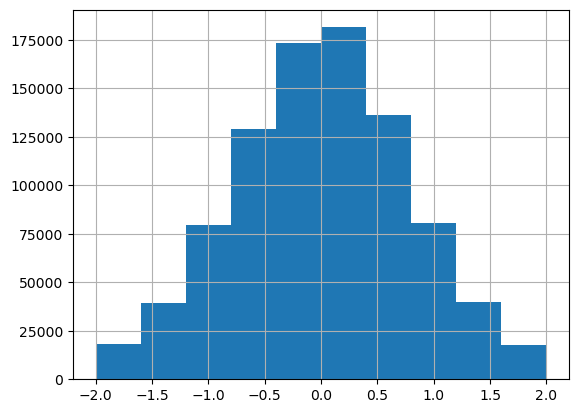

In [53]:
# plot the distribution of the X, limit x axis to be -2, 2
df_matched['X'].hist(bins=10, range=(-2, 2))

<AxesSubplot:>

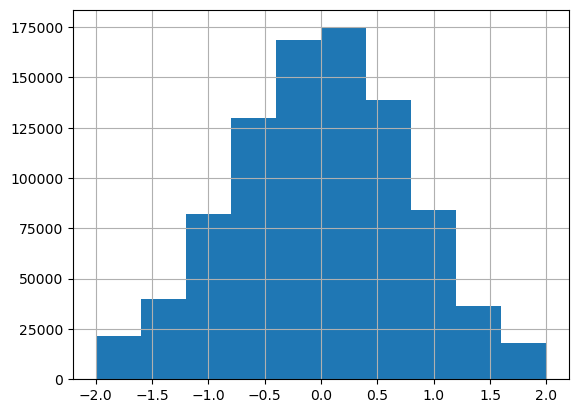

In [54]:
# plot the distribution of the Y, limit y axis to be -2, 2
df_matched['Y'].hist(bins=10, range=(-2, 2))

<AxesSubplot:>

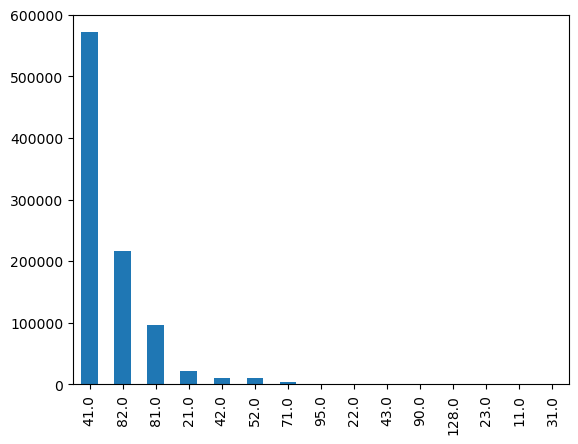

In [49]:
# plot the frequency table of the covariate
df_matched['covariate'].value_counts().plot(kind='bar')


In [50]:
# save df_matched to csv
df_matched.to_csv('Female/Processed/deer_movement_all.csv')